# Regresión logística

La regresión logística es un algoritmo de clasificación lineal. La clasificación es un problema en el que la tarea es asignar una categoría/clase a una nueva instancia que aprende las propiedades de cada clase a partir de los datos etiquetados existentes, llamado conjunto de entrenamiento. Ejemplos de problemas de clasificación pueden ser la clasificación de correos electrónicos como spam y no spam, observar la altura, el peso y otros atributos para clasificar a una persona como apta o no apta, etc.

En estadística, el modelo logístico (o modelo logit) se utiliza para modelar la probabilidad de que exista una determinada clase o evento, como pasa/falla, gana/pierde, vivo/muerto o sano/enfermo.

**¿Por qué debemos aprender Regresión Logística?**

- Es el primer algoritmo de aprendizaje supervisado que les viene a la mente a los profesionales de la ciencia de datos para crear un modelo de referencia sólido para verificar la mejora.

- Es un algoritmo fundamental, poderoso y fácilmente implementable. También es un modelo muy intuitivo e interpretable ya que los resultados finales son coeficientes que representan la relación entre la variable de respuesta y las características.

**¿La regresión logística es un regresor o un clasificador?**

La regresión logística generalmente se usa como clasificador porque predice clases discretas.
Habiendo dicho eso, técnicamente genera un valor continuo asociado con cada predicción, al producir un puntaje de probabilidad junto con su predicción de clasificación.

Entonces vemos que en realidad es un algoritmo de regresión que puede resolver problemas de clasificación.

## ¿Qué parámetros se pueden ajustar en los modelos de Regresión logística?

Hay varios hiperparámetros que se pueden optimizar en Regresión logística. Para ver todos los disponibles y sus posibles valores, haz clic en: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Sin embargo, aquí le mostraremos los principales hiperparámetros que podemos sintonizar en la regresión logística.

**Solver** es el algoritmo a utilizar en el problema de optimización. Las opciones son {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, y el valor predeterminado es 'lbfgs'.

- *lbfgs* funciona relativamente bien en comparación con otros métodos y ahorra mucha memoria, sin embargo, a veces puede tener problemas con la convergencia.

- *sag* más rápido que otros solucionadores para grandes conjuntos de datos, cuando tanto la cantidad de muestras como la cantidad de características son grandes.

- *saga* es el solucionador elegido para la regresión logística multinomial dispersa y también es adecuado para conjuntos de datos muy grandes.

- *newton-cg* computacionalmente caro debido a la Hessian Matrix.

- *liblinear* recomendado cuando tiene un conjunto de datos de gran dimensión, resolviendo problemas de clasificación a gran escala.

> Nota: la convergencia rápida 'sag' y 'saga' solo está garantizada en características con aproximadamente la misma escala. Puede preprocesar los datos con un escalador de sklearn.preprocessing.

**Penalización (o regularización)** pretende reducir el error de generalización del modelo y pretende desincentivar y regular el sobreajuste. La técnica desalienta el aprendizaje de un modelo más complejo, para evitar el riesgo de sobreajuste. Las opciones son: {'l1', 'l2', 'elasticnet', 'none'}, y el valor predeterminado es 'l2'.

> Nota: no todos los solucionadores admiten todos los términos de regularización.

**C (o fuerza de regularización)** debe ser un flotante positivo. La fuerza de regularización trabaja con la penalización para regular el sobreajuste. Los valores más pequeños especifican una regularización más fuerte y un valor alto le dice al modelo que otorgue mayor peso a los datos de entrenamiento.   

La regresión logística ofrece otros parámetros como:

- class_weight.

- dualbool (para conjuntos de datos dispersos cuando n_samples > n_features).

- max_iter (puede mejorar la convergencia con iteraciones más altas, y otros. Sin embargo, estos proporcionan menos impacto).

## Uso de regresión logística en la predicción de supervivencia del Titanic

En el conjunto de datos del Titanic tenemos más de una característica, y con la regresión logística predecimos si sobrevivirán o no. Si el valor que predice el modelo fuera 0.85, eso significaría que la persona es 85% sobreviviente y 15% no sobreviviente.

Imaginemos que el conjunto de datos titánico solo tiene una característica (Sexo) y nos gustaría predecir si el pasajero sobrevive o no, lo que estamos tratando de calcular es básicamente:

$P(survive|sex=male)$

$P(survive|sex=female)$

Cuando la probabilidad es mayor o igual a 0.5, el valor binario es 1, y cuando la probabilidad es menor a 0.5, el valor binario es 0. Entonces, la persona que acabamos de mencionar se clasificaría como 1, lo que significa que él o ella sobrevivió.

### La curva de regresión logística

![logistic_regression_curve](../assets/logistic_regression_curve.jpg)

La función logística, también llamada función sigmoidea, es una curva en forma de S que puede tomar cualquier número de valor real y asignarlo a un valor entre 0 y 1, pero nunca exactamente en esos límites.

La regresión logística utiliza la estimación de máxima verosimilitud, que calcula la probabilidad de que una persona sea sobreviviente del Titanic, y luego otra, y luego otra... Después de realizar todos los cálculos, el modelo multiplica todas esas probabilidades y ajusta la línea en forma de S a los datos. Sigue calculando, hasta que encuentra la mejor línea en forma de S.

### La ecuación de regresión logística

Los valores de entrada (x) se combinan linealmente usando pesos o valores de coeficiente (conocidos como la letra mayúscula griega Beta) para predecir un valor de salida (y). Una diferencia clave de la regresión lineal es que el valor de salida que se modela es un valor binario (0 o 1) en lugar de un valor numérico.

A continuación se muestra un ejemplo de ecuación de regresión logística:

$y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))$

Donde y es la salida pronosticada, b0 es el término de sesgo o intersección y b1 es el coeficiente para el valor de entrada único (x). Cada columna en sus datos de entrada tiene un coeficiente b asociado (un valor real constante) que debe aprenderse de sus datos de entrenamiento. Esto se hace utilizando la estimación de máxima verosimilitud. La intuición de máxima verosimilitud para la regresión logística es que un procedimiento de búsqueda, busca valores para los coeficientes (valores Beta) que minimicen el error en las probabilidades predichas por el modelo a las de los datos.

The actual representation of the model that you would store in memory or in a file are the coefficients in the equation (the beta value or b’s).

Para obtener las probabilidades con Python puedes usar:

```py

y_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

```

Esto te dará un array de 'probabilidad de estar en cada clase' dada a cada observación, pero también puedes obtener la probabilidad de estar en la clase '1':

```py

# Puntaje

y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

```

### Modelado Titanic

In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Cargando el marco de datos final**

Para comenzar a modelar, nos centraremos en los datos de nuestro tren y nos olvidaremos temporalmente del conjunto de datos donde necesitamos hacer predicciones.

Comencemos cargando nuestros datos limpios del tren titánico y asígnele el nombre final_df.

In [2]:
# Cargando conjunto de datos de clean train

final_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv')

In [3]:
# Echemos un vistazo a nuestras primeras 10 filas para verificar que todos los datos sean numéricos.

final_df.head(10)

Unnamed: 0  Embarked_C  Embarked_Q  Embarked_S  Female  Male  Survived  \
0           0         0.0         0.0         1.0     0.0   1.0       0.0   
1           1         1.0         0.0         0.0     1.0   0.0       1.0   
2           2         0.0         0.0         1.0     1.0   0.0       1.0   
3           3         0.0         0.0         1.0     1.0   0.0       1.0   
4           4         0.0         0.0         1.0     0.0   1.0       0.0   
5           5         0.0         1.0         0.0     0.0   1.0       0.0   
6           6         0.0         0.0         1.0     0.0   1.0       0.0   
7           7         0.0         0.0         1.0     0.0   1.0       0.0   
8           8         0.0         0.0         1.0     1.0   0.0       1.0   
9           9         1.0         0.0         0.0     1.0   0.0       1.0   

   Pclass       Age  SibSp  Parch      Fare  fam_mbrs  
0     3.0  0.271174    1.0    0.0  0.027567       1.0  
1     1.0  0.472229    1.0    0.0  0.271039       1.0  
2     3.0  0.321438    0.0    0.0  0.030133       0.0  
3     1.0  0.434531    1.0    0.0  0.201901       1.0  
4     3.0  0.434531    0.0    0.0  0.030608       0.0  
5     3.0  0.346569    0.0    0.0  0.032161       0.0  
6     1.0  0.673285    0.0    0.0  0.197196       0.0  
7     3.0  0.019854    3.0    1.0  0.080133       4.0  
8     3.0  0.334004    0.0    2.0  0.042332       2.0  
9     2.0  0.170646    1.0    0.0  0.114338       1.0

**Características separadas y objetivo como X e y**

In [4]:
X = final_df.drop(['Survived','Unnamed: 0'], axis=1)
y = final_df['Survived']

**Marco de datos dividido en conjunto de entrenamiento y conjunto de prueba**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

# Crear instancias de regresión logística

model = LogisticRegression()

In [7]:
# Ajustar los datos

model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Hacer predicciones

y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1.])

In [37]:
# Comprobar la puntuación de precisión

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

accuracy_score(y_test, y_pred)

0.8146067415730337

In [39]:
# Matriz de confusión

titanic_cm = confusion_matrix(y_pred, y_test)
titanic_cm

array([[87, 16],
       [17, 58]])

Si quieres puedes poner tu matriz de confusión en un gráfico más bonito

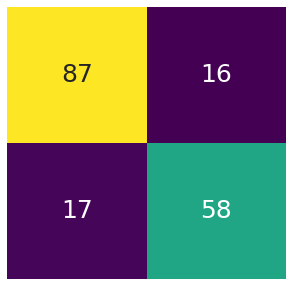

In [41]:
# Convertir el ndarray en un marco de datos de pandas
cm_df = pd.DataFrame(titanic_cm)
# Set the size of the figure
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # Decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

Observaciones: 16 + 17 = 33 predicción incorrecta. ¿Podemos hacerlo mejor?

Usemos GridSearch para ver cuáles serían los mejores hiperparámetros para nuestro modelo de regresión logística.

El siguiente código demuestra la búsqueda en cuadrícula de los hiperparámetros clave para LogisticRegression en un conjunto de datos de clasificación binaria, en este caso, nuestro conjunto de datos Titanic. 

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir modelos y parámetros

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Definir búsqueda de cuadrícula

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# Resumir resultados

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.798102 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793216 (0.032933) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793216 (0.032933) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.792833 (0.031946) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.793212 (0.032824) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793212 (0.032824) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793969 (0.031699) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.796582 (0.034081) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796582 (0.034081) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796229 (0.036167) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.798102 (0.037820) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798102 (0.037820) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.797706 (0.040030) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.783801 (0.034749) wit

Solver newton-cg solo admite penalizaciones 'l2' o 'ninguna', es por eso que solo incluimos 'l2'.

Observaciones: De hecho, obtuvimos una mejor puntuación primero. Confirmemos esto obteniendo de nuevo la matriz de confusión.

In [42]:
# Parámetros de hipertonía

optimized_model = LogisticRegression(C= 0.1, penalty='l2', solver= 'newton-cg')


In [43]:
# Ajustar los datos

optimized_model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [44]:
# Hacer predicciones

y_pred = optimized_model.predict(X_test)
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1.])

In [45]:
# Comprobar la puntuación de precisión

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred, y_test)

0.8089887640449438

In [46]:
# Matriz de confusión

confusion_matrix(y_pred, y_test)

array([[85, 15],
       [19, 59]])

Observaciones: En efecto, ahora tenemos 34 (15 + 19) predicciones incorrectas. Teníamos 33 con nuestro primer modelo de referencia.

En el último módulo de preprocesamiento de datos, aprendimos algunas técnicas de selección de características si es necesario. Sin embargo, el conjunto de datos limpio final se guardó antes de cualquier implementación de selección de características. Entonces, usemos una técnica de selección de características aquí y veamos si hace que nuestro modelo mejore.

**Eliminación de características recursivas**

Dado un estimador externo que asigna pesos a las características, la eliminación recursiva de características (RFE) consiste en seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños. Primero, el estimador se entrena en el conjunto inicial de características y la importancia de cada característica se obtiene a través de un atributo coef_ o mediante un atributo feature_importances_. Luego, las características menos importantes se eliminan del conjunto actual de funciones. Ese procedimiento se repite recursivamente en el conjunto eliminado hasta que finalmente se alcanza el número deseado de funciones para seleccionar.

In [47]:
from sklearn.feature_selection import RFE

# Crear el modelo RFE y selecciona 9 atributos
rfe = RFE(model, n_features_to_select=9)
rfe = rfe.fit(X, y)

# Resumir la selección de los atributos.
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Female', 'Male', 'Pclass', 'Age', 'SibSp', 'fam_mbrs']


Estos son los 9 atributos sugeridos. Pero, ¿9 es el número óptimo de características del Titanic para ingresar a mi modelo?

**Clasificación de características con eliminación recursiva de características y validación cruzada**

RFECV realiza RFE en un ciclo de validación cruzada para encontrar el número óptimo o el mejor número de características. A continuación, se aplica una eliminación recursiva de características en regresión logística con ajuste automático del número de características seleccionadas con validación cruzada.

Optimal number of features: 8
Selected features: ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Female', 'Male', 'Pclass', 'Age', 'SibSp']


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


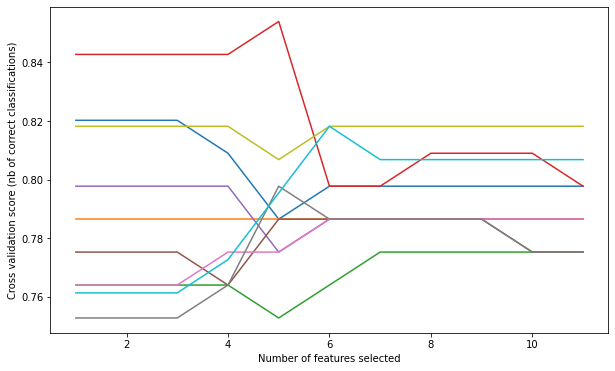

In [48]:
from sklearn.feature_selection import RFECV

# Crear el objeto RFE y calcular una puntuación de validación cruzada.
# La puntuación de "precisión" es proporcional al número de clasificaciones correctas

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Trazar el número de características VS. puntajes de validación cruzada

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Observaciones: Vemos que el número óptimo de características sugeridas es en realidad 8. El número total de miembros de la familia no se consideró importante.

**Evaluación del modelo basada en la validación cruzada de K-fold usando la función cross_val_score()**

- Esta vez vamos a utilizar un marco de datos de nuevas características (new_X) con solo las características seleccionadas.

- Esta vez, el método de división será la validación cruzada de K-fold con 10 pliegues.

- El modelo seguirá siendo una regresión logística, pero usaremos los mejores hiperparámetros que obtuvimos en la búsqueda en cuadrícula.

- Sabemos que la precisión no siempre es la mejor o siempre la mala medida para evaluar. Hay muchas métricas como Recall, Precision, F1 Score y mucho más. Propondremos 3 métricas de evaluación diferentes. Las métricas propuestas serán 'precisión', 'neg_log_loss' y 'roc_auc'.

- Finalmente, se utilizará la función cross_val_score() para realizar la evaluación, tomando el conjunto de datos y la configuración de validación cruzada y devolviendo una lista de puntajes calculados para cada pliegue.


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

Selected_features = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Female', 'Male', 'Pclass', 'Age', 'SibSp']

# Crear nueva X (funciones seleccionadas)
new_X = final_df[Selected_features]

# Regresión logística de validación cruzada de 10 veces, utilizando los mejores hiperparámetros que nos proporcionó la búsqueda en cuadrícula.

logreg = LogisticRegression(C= 0.1, penalty='l2', solver= 'newton-cg')

# Usar la función cross_val_score
# Estamos pasando la totalidad de X e y, ya no X_train o y_train
# cv=10 para 10 pliegues
# Puntuación = {'precisión', 'neg_log_loss', 'roc_auc'} para la métrica de evaluación

scores_accuracy = cross_val_score(logreg, new_X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, new_X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, new_X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.798
LogisticRegression average log_loss is 0.459
LogisticRegression average auc is 0.847


Ten en cuenta que al usar la métrica 'roc_auc' habríamos obtenido una mejor puntuación que la precisión. Si quisiéramos repetir nuestro proceso de modelado usando esta métrica de evaluación, considera usar predict_proba(X_test) para predecir las probabilidades y también grafica las curvas auc_roc, porque si usas model.predict(X_test), el método no tendrá todo lo necesario información para construir todos los puntos de la curva.

¡Terminemos nuestras predicciones de clase!

Necesitamos ajustar todos los datos de entrenamiento al estimador una vez que estemos satisfechos con los resultados de cross_val_score, antes de que podamos usarlos para predecir los datos de prueba del Titanic.

In [51]:
# Ajustemos todos los datos de nuestro Titanic train con este modelo.

logreg.fit(new_X,y)

LogisticRegression(C=0.1, solver='newton-cg')

En el siguiente código, veamos cómo generar nuestras predicciones y guardarlas en un archivo de predicciones con el Id correcto.

In [52]:
# Cargar el conjunto de prueba inicial (el que aún no se limpió y donde necesitamos hacer predicciones)

initial_test_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv')

# Cargar equipo de prueba limpio

final_test = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_test.csv')

# Agregar la columna sobrevivida al conjunto de prueba limpio para hacer predicciones

final_test['Survived'] = logreg.predict(final_test[Selected_features])

# Poner la columna 'PassengerId' de nuevo en el conjunto de prueba

final_test['PassengerId'] = initial_test_df['PassengerId']

# Creaando un marco de datos de predicciones final

submission = final_test[['PassengerId','Survived']]

# Convertir el marco de datos final en un archivo csv
# Normalmente, este es el archivo csv requerido en las competiciones de Kaggle

submission.to_csv("submission.csv", index=False)

Eche un vistazo a nuestras predicciones en las últimas filas del conjunto de prueba

In [53]:
submission.tail()

PassengerId  Survived
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

## Consideraciones de importación antes de modelar con regresión logística

En última instancia, en los proyectos de aprendizaje automático de modelado predictivo, nos centramos en hacer predicciones precisas en lugar de interpretar los resultados. Como tal, podemos romper algunas suposiciones siempre que el modelo sea robusto y funcione bien.

- Variable de salida binaria: esto puede ser obvio como ya lo mencionamos, pero la regresión logística está pensada para problemas de clasificación binaria (dos clases). Predecirá la probabilidad de que una instancia pertenezca a la clase predeterminada, que se puede ajustar a una clasificación de 0 o 1.

- Eliminar ruido: la regresión logística no asume ningún error en la variable de salida (y), considere eliminar los valores atípicos y posiblemente las instancias mal clasificadas de sus datos de entrenamiento. 

- Distribución gaussiana: la regresión logística es un algoritmo lineal (con una transformación no lineal en la salida). Asume una relación lineal entre las variables de entrada con la salida. Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden dar como resultado un modelo más preciso. Por ejemplo, puedes usar log, root, Box-Cox y otras transformaciones univariadas para exponer mejor esta relación.

- Eliminar entradas correlacionadas: al igual que la regresión lineal, el modelo puede sobreajustarse si tiene varias entradas altamente correlacionadas. Considera calcular las correlaciones por pares entre todas las entradas y eliminar las entradas altamente correlacionadas.

- Error al converger: es posible que el proceso de estimación de probabilidad esperada que aprende los coeficientes no converja. Esto puede suceder si hay muchas entradas altamente correlacionadas en sus datos o si los datos son muy escasos (por ejemplo, muchos ceros en sus datos de entrada).

Considerando esto, ¿hay algún cambio que harías en tu fase de preprocesamiento de datos?

Fuente:

https://towardsdatascience.com/a-handbook-for-logistic-regression-bb2d0dc6d8a8

https://www.displayr.com/how-to-interpret-logistic-regression-coefficients/

https://towardsdatascience.com/a-handbook-for-logistic-regression-bb2d0dc6d8a8

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/#:~:text=Logistic%20regression%20does%20not%20really,with%20different%20solvers%20(solver).&text=Regularization%20(penalty)%20can%20sometimes%20be%20helpful.

https://machinelearningmastery.com/logistic-regression-for-machine-learning/

https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook

https://www.kaggle.com/code/rmiperrier/tps-mar-lgbm-predict-proba-vs-predict?scriptVersionId=55643096

https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
